In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

## 1. Define Hyper-parameters and pre-set device on cuda

In [2]:
# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device: {device}')

num_classes = 10
in_channel = 1

# Hyper-Parameter
num_epochs = 5
batch_size = 50
max_pool_kernel = 2
learning_rate = 0.001

device: cpu


## 2. Load Data

In [3]:
train_data = torchvision.datasets.MNIST(root='./datasets',
                                        train = True,
                                        transform = transforms.ToTensor(),
                                        download = True)
test_data = torchvision.datasets.MNIST(root = './datasets',
                                       train = False,
                                       transform = transforms.ToTensor(),
                                       download = True)

## 3. Load DataLoader

In [4]:
train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                           batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                          batch_size = batch_size,
                                          shuffle = False)

## 4. Define Model

In [5]:
class Conv(nn.Module):
  def __init__(self, num_classes = 10):
    super(Conv, self).__init__()
    self.layer1 = nn.Sequential( # 28x28x1 --> 28x28x16
        nn.Conv2d(in_channels=in_channel, out_channels=16, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(max_pool_kernel) # 28x28x16 --> 14x14x16
    )
    self.layer2 = nn.Sequential( # 14x14x16 --> 14x14x32
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(max_pool_kernel) # 14x14x32 --> 7x7x32
    )
    self.fc1 = nn.Linear(7*7*32, 120)
    self.fc2 = nn.Linear(120, num_classes)

  def forward1(self, x):
    x = self.layer1(x)
    return x
  def forward2(self, x):
    x = self.layer2(x)
    return x
  def forward3(self, x):
    x = x.reshape(x.size(0), -1)
    x = self.fc1(x)
    return x
  def forward4(self, x):
    x = self.fc2(x)
    return x

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)

    x = x.reshape(x.size(0), -1)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)

    return x

In [6]:
model = Conv(num_classes)

In [7]:
print(model)

Conv(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1568, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)


## 5. Inside CNN

### 1) Row Image

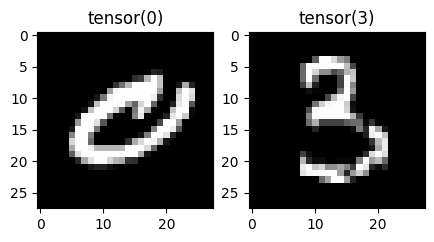

In [8]:
def image_show(tensor_image):
  # tensor_image.size = (batch_size, image width, image height)
  image = tensor_image.reshape(tensor_image.size()[1], tensor_image.size()[2])    # width x height
  plt.imshow(image, cmap='gray')

images, labels = next(iter(train_loader))
image1, label1 = images[0], labels[0]
image2, label2 = images[1], labels[1]

plt.figure(figsize=(5,5))

plt.subplot(1,2,1)
image_show(image1)
plt.title(label1)

plt.subplot(1,2,2)
image_show(image2)
plt.title(label2)

plt.show()

In [9]:
image1.size()

torch.Size([1, 28, 28])

In [10]:
image1[-1]  # 1개의 채널이지만 인덱싱해서 28x28의 2차원 Tensor 데이터로 확인
            # 각각의 데이터는 0과 1사이에 있으며 1에 가까울수록 진한 것을 확인 가능

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

### 2) After 1st Convolution Layer

흑백이므로 1개의 채널, 이미지 크기 28x28의 입력이 첫 번째 Covolution Layer를 지나면서 16개의 out_channel을 갖게 되고   
이미지 크기는 2x2 Maxpooling으로 인해 14x14로 절반으로 줄어들었다

In [11]:
model.eval()
output1 = model.forward1(images)
print(f"{images.size()} --> {output1.size()}")

torch.Size([50, 1, 28, 28]) --> torch.Size([50, 16, 14, 14])


In [12]:
image1, image2 = output1[0], output1[1]
print(image1.size(), image2.size())

torch.Size([16, 14, 14]) torch.Size([16, 14, 14])


In [13]:
image1[-1]  # 16개 중 마지막을 출력한 것으로, 14개씩 14개로 이루어진 2차원 tensor임을 확인할 수 있다
            # 추가적으로, ReLU를 지났기 때문에 음수 값은 없으며 기존 데이터도 1이하이므로 0 ~ 1 사이의 값이 유지된 것을 확인할 수 있다

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0486, 0.1057,
         0.1258, 0.0622, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0311, 0.1329, 0.3177, 0.3920, 0.5530,
         0.3988, 0.0934, 0.1605, 0.1332, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0495, 0.2063, 0.6323, 0.7056, 0.7271, 0.7372,
         0.1695, 0.2287, 0.3752, 0.0996, 0.0029],
        [0.0000, 0.0000, 0.0763, 0.3021, 0.7059, 0.6777, 0.5632, 0.2355, 0.0246,
         0.0000, 0.4539, 0.3340, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1899, 0.6944, 0.6607, 0.3098, 0.0000, 0.0000, 0.0000,
         0.2531, 0.5284, 0.3326, 0.0000, 0.0000],
        [0.0000, 0.0932, 0.6323, 0.5996, 0.3552, 0.0000, 0.0173, 0.0408, 0.2303,
  

첫 번째 Convolution layer를 지나고 난 이후,   
channel이 16이고 image의 사이즈가 14x14인 상태이다

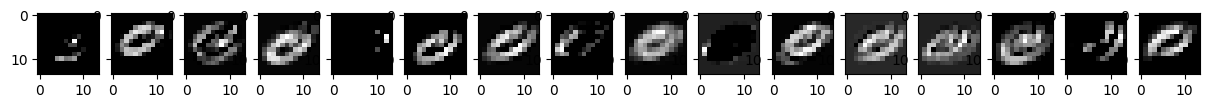

In [14]:
plt.figure(figsize=(15,15))

for i in range(len(image1)):
  plt.subplot(1, len(image1), i+1)
  plt.imshow(image1[i].detach().numpy(), cmap='gray')

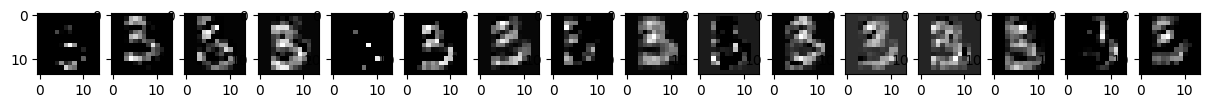

In [15]:
plt.figure(figsize=(15,15))

for i in range(len(image2)):
  plt.subplot(1, len(image2), i+1)
  plt.imshow(image2[i].detach().numpy(), cmap='gray')

Convolutional Layer는 입력 데이터에 대한 특징을 추출하는 역할을 한다.   
각각의 필터(커널)는 특정한 패턴이나 특징을 감지하도록 설계되어 있고   
현재 첫 번째 Convolution layer를 지난 후 16개의 채널은 feature map의 차원을 의미한다   

각 필터(커널)는 입력 이미지의 작은 영역에 대해 가중치를 적용하고, 이를 통해 새로운 특징 맵(feature map)을 생성한다.   
여러 개의 필터가 함께 작동하여 서로 다른 특징을 동시에 감지하고, 이렇게 얻은 다양한 특징 맵들이 다음 레이어로 전달된다.   

즉 현재 16개의 서로 다른 이미지들은 모두 이미지의 16가지 feature을 나타내고 있는 것이라고 이해하면 된다

### 3) After 2nd Convolution Layer

16개의 채널과 14x14의 크기를 가진 output1이 2번째 Convolution Layer를 지나면서   
32개의 out_channel을 갖게 되었고 2x2 Maxpooling을 통해 이미지는 다시 절반의 크기로 줄어들어 7x7이 되었다   

In [16]:
output2 = model.forward2(output1)
print(f"{output1.size()} --> {output2.size()}")

torch.Size([50, 16, 14, 14]) --> torch.Size([50, 32, 7, 7])


In [17]:
image1, image2 = output2[0], output2[1]
print(image1.size(), image2.size())

torch.Size([32, 7, 7]) torch.Size([32, 7, 7])


In [18]:
image1.size()

torch.Size([32, 7, 7])

In [19]:
image1[-1]  # 32개 중 마지막을 가져왔으며 7x7임을 확인할 수 있다
            # 똑같이 ReLU를 지났기 때문에 0 ~ 1 사이의 값으로 나타난 것을 확인할 수 있다

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0258],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0102, 0.0000, 0.0332, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0011]],
       grad_fn=<SelectBackward0>)

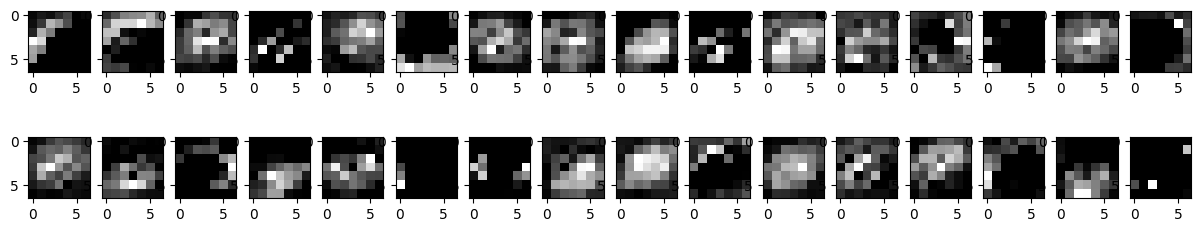

In [20]:
plt.figure(figsize=(15,3))

for i in range(len(image1)):
  plt.subplot(2, int(len(image1)/2), i+1)
  plt.imshow(image1[i].detach().numpy(), cmap='gray')

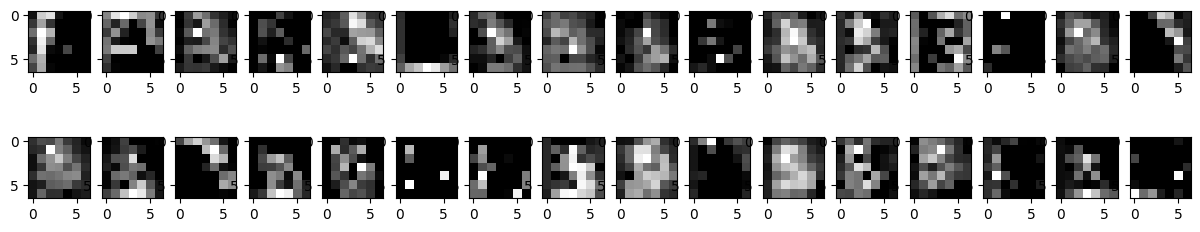

In [21]:
plt.figure(figsize=(15,3))

for i in range(len(image2)):
  plt.subplot(2, int(len(image2)/2), i+1)
  plt.imshow(image2[i].detach().numpy(), cmap='gray')

2번째 Convolution Layer를 지나면서 32개의 feature map이 생기게 되고,   
feature map이 증가하는 만큼, 서로 다른 특징을 담고 있기 때문에 각각의 이미지는 원래의 형태(label)을 알아보기 어려워진다

### 4) After 3rd Fully Connected Layer

32개의 out_channel과 7x7의 이미지 크기를 1차원으로 flatten하여 Fully Connected Layer에 입력으로 넣는다.   
이때 x=x.reshape(x.size(0), -1)이 사용되는데, 이는 첫번째에 batch_size, 그리고 나머지를 자동 계산하여 두번째에 할당하게 된다

In [22]:
output3 = model.forward3(output2)
print(f"{output2.size()} --> {output3.size()}")

torch.Size([50, 32, 7, 7]) --> torch.Size([50, 120])


In [23]:
image1, image2 = output3[0], output3[1]
print(image1.size(), image2.size())

torch.Size([120]) torch.Size([120])


In [24]:
# plt.imshow(image1[0].detach().numpy()) 더이상 이미지로 표현할 수 있는 2차원이 아닌, 1차원이기 때문에 오류가 발생한다

In [25]:
print(image1.size())
image1  # 1차원에 120개의 tensor로 이루어져 있음을 확인할 수 있으며
        # ReLU를 적용하지 않았기 때문에 음수 값이 나온 것도 확인해볼 수 있다
        # ReLu는 확인을 위해 적용하지 않은 것이며, 실제로 train에 사용하는 forward에는 적용되어 있다

torch.Size([120])


tensor([-0.0069,  0.0201, -0.0476, -0.0050,  0.0126,  0.1516,  0.0005,  0.0478,
        -0.1248, -0.0278, -0.0492, -0.0648, -0.0408, -0.0297,  0.1020,  0.1137,
        -0.0217,  0.0639, -0.0827, -0.1242,  0.0850, -0.0409, -0.0123, -0.0616,
        -0.0325, -0.0193, -0.1192,  0.1126,  0.0342,  0.0486,  0.0302, -0.0448,
         0.0373, -0.0154, -0.0086,  0.0301,  0.0486,  0.0945,  0.0440, -0.0197,
        -0.0844,  0.0440, -0.0298, -0.0518,  0.0685,  0.0632, -0.0502, -0.0182,
         0.0382,  0.0036,  0.0040,  0.0008,  0.0116, -0.0030,  0.1174, -0.0154,
         0.1824,  0.0610,  0.1178,  0.2421,  0.0405, -0.0237, -0.0019, -0.0269,
         0.0251,  0.0793,  0.1142, -0.0490,  0.1042,  0.0102,  0.0109,  0.0787,
        -0.0446,  0.0659,  0.1011, -0.2111, -0.1232, -0.0556,  0.0391, -0.0272,
         0.0761, -0.0497, -0.0128,  0.0202,  0.0150,  0.0529, -0.1097,  0.0103,
        -0.1277, -0.0046, -0.0562,  0.0597,  0.0110, -0.0508,  0.0863, -0.0575,
        -0.0893,  0.0038, -0.0199, -0.06

## 5) After 4th Fully Connected Layer

In [26]:
output4 = model.forward4(output3)
print(f"{output3.size()} --> {output4.size()}")

torch.Size([50, 120]) --> torch.Size([50, 10])


In [27]:
image1, image2 = output4[0], output4[1]
print(image1.size())
print(image2.size())

torch.Size([10])
torch.Size([10])


In [28]:
print("image1")
print("the final tensor :", image1)
print("the result prediction:", image1.tolist().index(image1.max()))
print("the original label:", label1)

image1
the final tensor : tensor([-0.0443,  0.0078, -0.0166,  0.0045, -0.0856,  0.0942, -0.0924, -0.0107,
         0.0115, -0.1015], grad_fn=<SelectBackward0>)
the result prediction: 5
the original label: tensor(0)


In [29]:
print("image2")
print("the final tensor:", image2)
print("the result prediction:", image2.tolist().index(image2.max()))
print("the original label:", label2)

image2
the final tensor: tensor([-0.0516,  0.0232, -0.0061, -0.0048, -0.0493,  0.1220, -0.0631, -0.0058,
         0.0592, -0.1152], grad_fn=<SelectBackward0>)
the result prediction: 5
the original label: tensor(3)


각각의 이미지에 대해 10개의 out_channel이 생기고 그 10개 중 가장 큰 값을 가지는 것이 최종 예측이 된다.   
현재 위의 예제에서는 train이 안 되었기 때문에 잘못된 예측을 하고 있다   

## 6. Criterion & Optimizer

In [30]:
model = Conv().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## 7. Train

In [31]:
total_step = len(train_loader)
total_loss = []
model.train()
for epoch in range(num_epochs):
  epoch_loss = []
  for i, (img, label) in enumerate(train_loader):
    # Assign Tensors to Configures Devices (gpu)
    img = img.to(device)
    label = label.to(device)

    # Forward propagation
    outputs = model(img)

    # Get Loss, Compute Gradient, Update Parameters
    loss = criterion(outputs, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_loss.append(loss.detach().cpu().numpy())
    # Print Loss
    if i % 10000 == 0 or (i+1)==len(train_loader):
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))
  total_loss.append(np.mean(epoch_loss))
  print(f"epoch{i} loss: {np.mean(epoch_loss)}")

Epoch [1/5], Step [1/1200], Loss: 2.3117
Epoch [1/5], Step [1200/1200], Loss: 0.0076
epoch1199 loss: 0.12283080071210861
Epoch [2/5], Step [1/1200], Loss: 0.0055
Epoch [2/5], Step [1200/1200], Loss: 0.0040
epoch1199 loss: 0.04706931486725807
Epoch [3/5], Step [1/1200], Loss: 0.0008
Epoch [3/5], Step [1200/1200], Loss: 0.0877
epoch1199 loss: 0.036088284105062485
Epoch [4/5], Step [1/1200], Loss: 0.0042
Epoch [4/5], Step [1200/1200], Loss: 0.0174
epoch1199 loss: 0.028094520792365074
Epoch [5/5], Step [1/1200], Loss: 0.0119
Epoch [5/5], Step [1200/1200], Loss: 0.0130
epoch1199 loss: 0.021764514967799187


## 8. Visualization

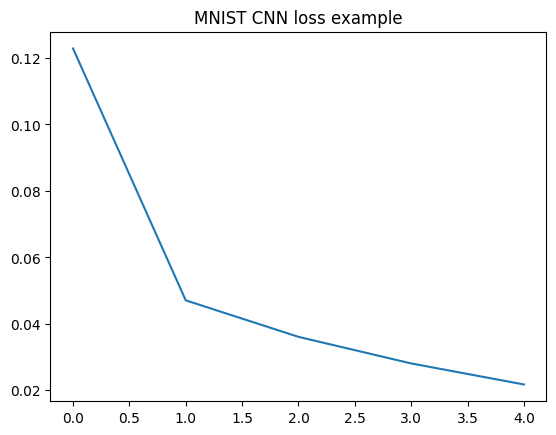

In [32]:
plt.plot(total_loss)
plt.title("MNIST CNN loss example")
plt.show()

## 9. Save Model and Load Model to test

In [33]:
# 9-1. save model
torch.save(model.state_dict(),"05-1. model.pth")   # model의 weight 정보 만을 저장

In [36]:
# 9-2. load model

test_model = Conv().to(device)
test_model.load_state_dict(torch.load("05-1. model.pth"))   # test_model이라는 모델 안에 앞서 학습한 weight 정보가 담기게 된다

<All keys matched successfully>

In [37]:
test_model.eval()

with torch.no_grad():
  correct = 0

  for img, lab in test_loader:
    img = img.to(device)
    lab = lab.to(device)
    out = test_model(img)
    _, pred = torch.max(out.data, 1)
    correct += (pred == lab).sum().item()

  print("Accuracy of the network on the {} test images: {}%".format(len(test_loader)*batch_size, 100 * correct / len(test_data)))

Accuracy of the network on the 10000 test images: 99.11%
